In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Analizamos un vidrio cuya fórmula química es:

# $$58GeO_2-41PbO-1Pr_2O_3$$

Luego a este vidrio se le implantan nano-partículas de $TiO_2$

# Transmitancia

In [2]:
T=pd.read_csv('transmitanciam.csv')

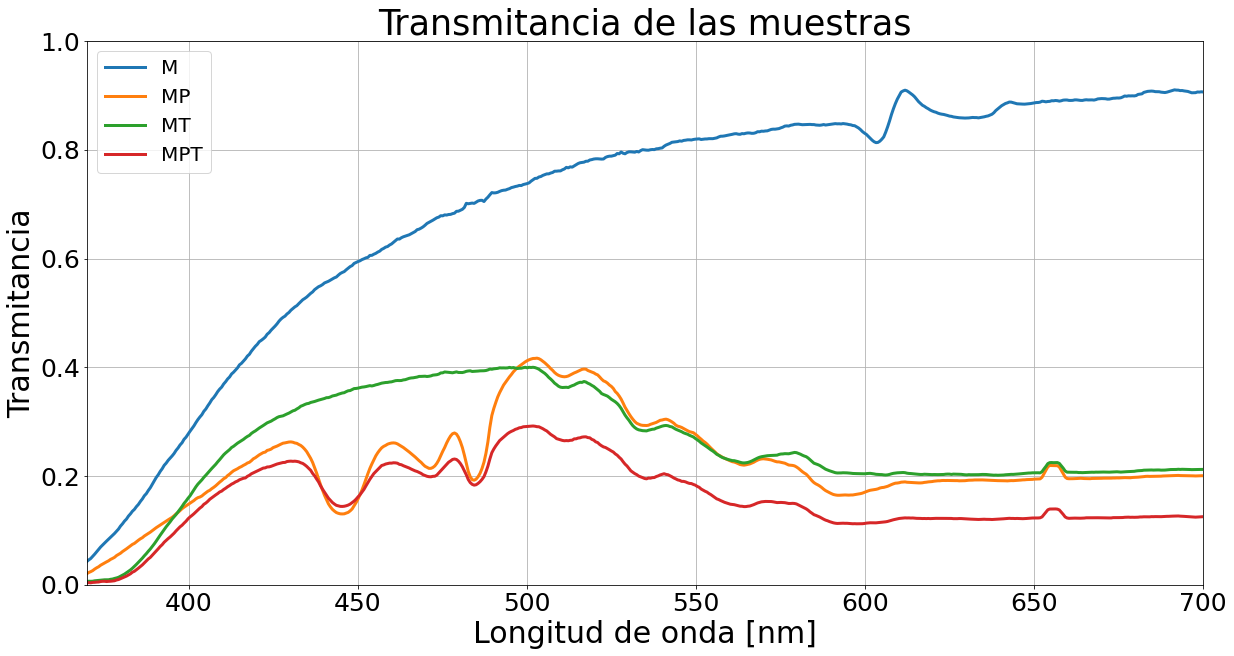

In [3]:
fig, ax=plt.subplots(1,1, figsize=(20,10))

ax.set_title("Transmitancia de las muestras", fontsize=35)
ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Transmitancia", fontsize=30)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


for key in T.keys()[1:]:
    ax.plot(T.wl, T[key], lw=3, label=key)

ax.set_xlim(370, 700)
ax.set_ylim(0, 1)


ax.legend(fontsize=20)
ax.grid()
plt.show()

#fig.savefig('transmitancia.svg', format='svg')


## Absorbancia

Ahora vamos a definir un dataframe a partir de la transmitancia tal que

# $$A=-log_{10}(T)$$

In [4]:
A=T.copy()

for key in  A.keys()[1:]:
   A[key]=A[key].map(lambda u: -np.log10(u))

A.to_csv('absorbancia.csv', index=False)

/tmp/ipykernel_31544/1365215819.py:4: RuntimeWarning: invalid value encountered in log10
  A[key]=A[key].map(lambda u: -np.log10(u))


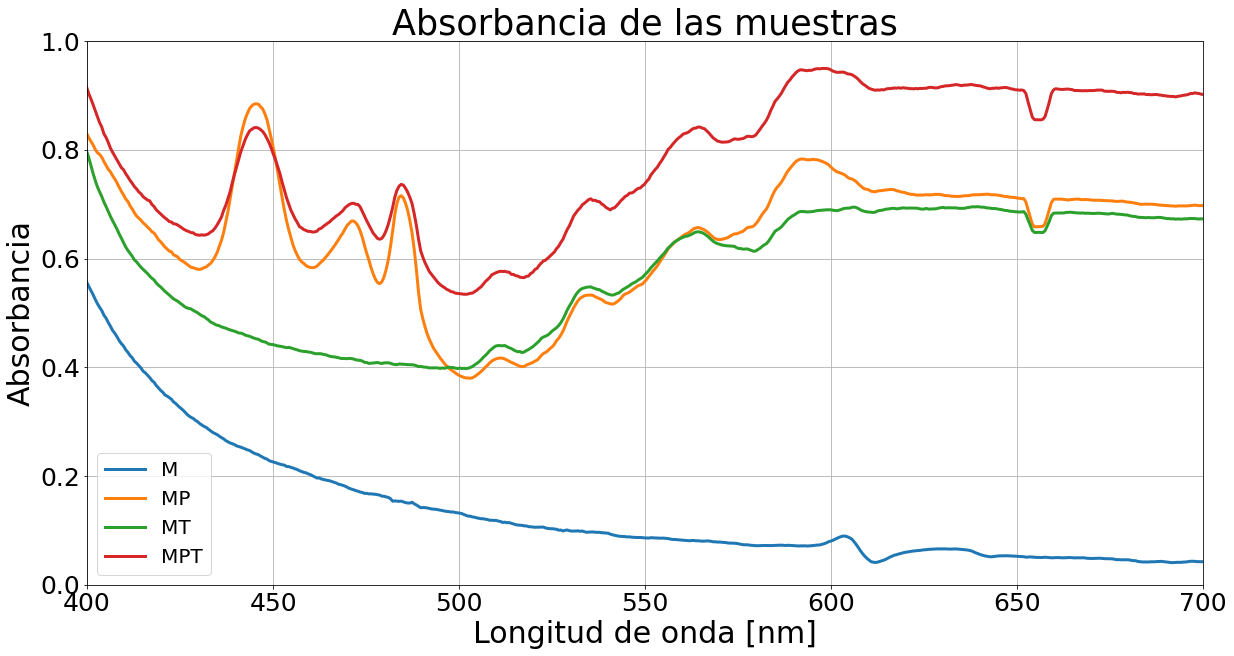

In [5]:
fig, ax=plt.subplots(1,1, figsize=(20,10))

ax.set_title("Absorbancia de las muestras", fontsize=35)
ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Absorbancia", fontsize=30)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


for key in A.keys()[1:]:
    ax.plot(A.wl, A[key], lw=3, label=key)

ax.set_xlim(400, 700)
ax.set_ylim(0, 1)


ax.legend(fontsize=20)
ax.grid()
plt.show()

#fig.savefig('transmitancia.svg', format='svg')

## Coeficiente de absorción $\alpha$

# $$\alpha=-\frac{ln(T)}{x}$$

In [6]:
B=T.copy()
X=0.45 #ancho de la muestra en cm
for key in  B.keys()[1:]:
    B[key]=B[key].map(lambda u: -1*np.log(u)/X)

/tmp/ipykernel_31544/1734413063.py:4: RuntimeWarning: invalid value encountered in log
  B[key]=B[key].map(lambda u: -1*np.log(u)/X)


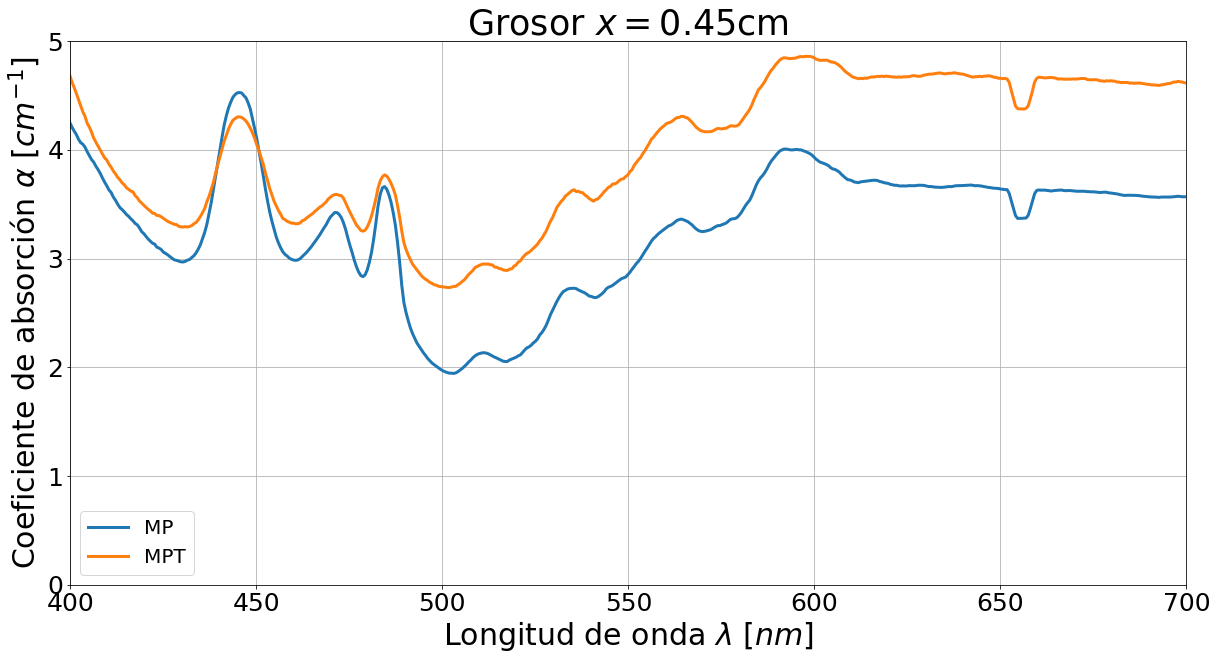

In [7]:
fig, ax=plt.subplots(1,1, figsize=(20,10))

ax.set_title(r"Grosor $x=${}cm".format(X), fontsize=35)
ax.set_xlabel("Longitud de onda $\lambda~[nm]$", fontsize=30)
ax.set_ylabel(r"Coeficiente de absorción $\alpha~[cm^{-1}]$", fontsize=30)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


#for key in B.keys()[1:]:
for key in ['MP', 'MPT']:
    ax.plot(B.wl, B[key], lw=3, label=key)

ax.set_xlim(400, 700)
ax.set_ylim(0, 5)


ax.legend(fontsize=20)
ax.grid()
plt.show()

#fig.savefig('transmitancia.svg', format='svg')

### Ahora vamos a graficar en función de la frecuancia 

## $$\nu=\frac{c}{\lambda}$$

In [8]:
c=299792458 #añadimos una columna al dataframe con la frecuencia de la luz
B['nu']=c/(B.wl*1e-9)

#B.drop(['wl', 'M', 'MT'] , axis=1, inplace=True)
#B.to_csv('coef_absor.csv', index=False)


In [9]:
B

,wl,M,MP,MT,MPT,nu
0,172.206390,0.167121,3.798032,3.423321,5.043084,1.740890e+15
1,172.805359,0.186052,3.669747,3.279717,5.092525,1.734856e+15
2,173.404282,0.158530,3.650199,3.113079,5.125048,1.728864e+15
3,174.003189,0.213447,3.784352,3.155273,5.120778,1.722914e+15
4,174.602066,0.220276,3.913219,3.225762,4.953252,1.717004e+15
...,...,...,...,...,...,...
1631,1098.043213,-0.060635,2.962105,3.139625,4.996995,2.730243e+14
1632,1098.572876,-0.092049,2.945943,3.083973,4.938255,2.728926e+14
1633,1099.102539,-0.053558,2.912364,3.106408,5.060473,2.727611e+14
1634,1099.632080,-0.058907,2.957175,3.100738,5.136285,2.726298e+14


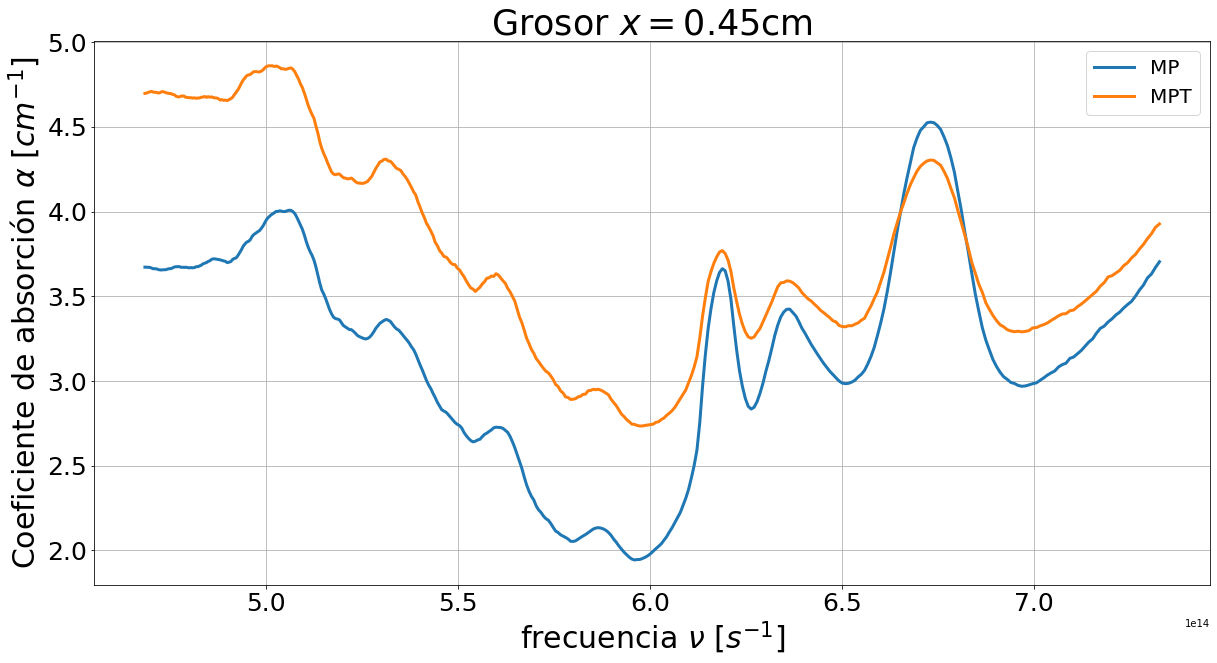

In [10]:
from scipy.signal import find_peaks #la función findpeaks entrega los índices de los máximos locales de un arreglo. 


ini=400 #el número de datos es 1636
fin=800#
df=B[ini:fin].reset_index(drop=True)#tomamos solo cierta parte del dataframe

df.to_csv('coef_absor.csv', index=False)

fig, ax=plt.subplots(1,1, figsize=(20,10))

ax.set_title(r"Grosor $x=${}cm".format(X), fontsize=35)
ax.set_xlabel(r"frecuencia $\nu~[s^{-1}$]", fontsize=30)
ax.set_ylabel(r"Coeficiente de absorción $\alpha~[cm^{-1}]$", fontsize=30)

ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

x=df['nu']

for key in ['MP', 'MPT']:
    ax.plot(x, df[key], lw=3, label=key)


ax.legend(fontsize=20)
ax.grid()
plt.show()

#fig.savefig('transmitancia.svg', format='svg')

### Ahora vamos a hallar la fuerza del oscilador experiemntal

In [3]:
Info=pd.read_excel('datos_alvaro.xlsx')

Sabiendo que el número de iónes por centímetro cúbico es: $N=$


## $$f_{exp}=\frac{m_e c}{\pi e^2 N} \int \alpha(\nu)d\nu$$

esta es una cantidad adimensional y da la tasa de transición entre el estado base y angún estado excitado. 

In [38]:
Area=Info['Area']
frec=Info['Center']
Info.head()

,Area,AreaIntg,Row Index,Beginning X,Ending X,FWHM,Center,Height
0,6177630000000,20.80876,132,607176000000000,626330000000000,8843750000000,618076000000000,0.67606
1,3719430000000,12.52856,109,627091000000000,649214000000000,11819300000000,635595000000000,0.30950
2,19706200000000,66.37841,64,654165000000000,692980000000000,19744200000000,673000000000000,0.99068


In [39]:
m=9.11e-28 #es gramos
c=2.9979*1e10 # en cm/s
e=4.8063e-10 #carga del electrón en esu
N=2.28e20 #número de átomos de praseodimio por cm^3 
h=6.6261e-27 #constante de Planck en erg*s

Fexp=[]

for a in Area:
    Fexp.append( (m*c/(np.pi*e**2*N) )*a )

In [40]:
print(Fexp)
print(frec.tolist())

def landa(frec):
    c=299792458
    L=[]
    Linv=[]
    for nu in frec:
        L.append(c/nu)
        Linv.append((nu/c)*1e-2)
    return (L, Linv)


print(landa(frec.tolist())[0])
print(landa(frec.tolist())[1])

[1.0196495747522332e-06, 6.139110334903028e-07, 3.2526095687152613e-06]
[618076000000000, 635595000000000, 673000000000000]
[4.850414156187912e-07, 4.716721465713229e-07, 4.4545684695393757e-07]
[20616.796170369304, 21201.167108746944, 22448.86360683563]


### Las energía corresponden a las transiciones hacia $^3P_0$, $^3P_1$ y $^3P_2$ 

# Ahora vamos a calcular la fuerza del oscilador teórica en la aproximación dipolar eléctrica

In [41]:
def parametros_judd(Fexp, frec, B, n, J):

    a=[]
    b=[]
    c=[]
    F=[0,0,0]

    cons=(8*np.pi**2*m*(n**2+2)**2)/(27*n*h*(2*J+1))
    cont=0
    for nu  in frec:
        a.append(nu*cons*B[cont, 0])
        b.append(nu*cons*B[cont, 1])
        c.append(nu*cons*B[cont, 2])

        cont+=1

    t=len(frec) #número de transiciones

    M=np.zeros((3, 3))

    for i in range(t):
        
        M[0, 0]+=a[i]**2
        M[1, 1]+=b[i]**2
        M[2, 2]+=c[i]**2

        M[0, 1]+=a[i]*b[i]
        M[1, 0]+=M[0, 1]

        M[0, 2]+=a[i]*c[i]
        M[2, 0]=M[0, 2]

        M[1, 2]+=b[i]*c[i]
        M[2, 1]=M[1, 2]

        F[0]+=a[i]*Fexp[i]
        F[1]+=b[i]*Fexp[i]
        F[2]+=c[i]*Fexp[i]
    
    return np.linalg.solve(M, F)

In [42]:
B=np.array([ [0.    , 0.1719, 0.    ], [0.    , 0.1708, 0.    ], [0.05  , 0.0333, 0.1247] ])
parametros_judd(Fexp, frec, B, n=2, J=4)

array([-1.53936198e-20,  9.43099732e-21,  5.18523593e-20])

In [43]:
# datos de prueba
A=np.array([[0.0000, 0.2293, 0.0548], [0.0102, 0.2451, 0.5126], [0.0020, 0.0845, 0.8491], 
            [0.0009,0.0092, 0.0417],  [0.9736, 0.5941, 0.0673], [0.0550, 0.1571, 0.0553], [0.0114, 0.0611, 0.0718]
             ,[0.0010,0.0441,0.0364], [0.0000, 0.0367, 0.0000],[0.0000, 0.0567, 0.0275], [0.0000,0.0036, 0.0080]   ])

nu=[3.38, 3.69,  4.04, 4.37, 5.09, 5.64, 5.82, 6.32, 6.93, 8.30, 8.49 ]
fexp=[1.07, 0.98, 3.50, 0.20, 17.47, 2.31, 1.39, 0.77, 0.36, 4.93, 3.78]

for i in range(len(nu)): 
    nu[i]=1e14*nu[i]
    fexp[i]=1e-6*fexp[i]



In [36]:
parametros_judd(fexp, nu, A, n=2, J=9/2)

array([-1.00241683e-21,  8.09425189e-20, -3.69934890e-21])